### Plots for the standard assignment, task 1

In [1]:
# Imports and functions
sys.path.insert(0, 'evoman') 
from environment import Environment
import neat_controller, demo_controller
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

# choose this for not using visuals and thus making experiments faster
headless = True
if headless:
    os.environ["SDL_VIDEODRIVER"] = "dummy"

def plot_stats(mean_max_f, std_max_f, mean_avgs, std_avgs, title, file_dir=None, file_name=''):
    generation = range(len(mean_max_f))
    max_fitness = np.array(mean_max_f)
    std_max_fitness = np.array(std_max_f)
    mean_avgs = np.array(mean_avgs)
    std_avgs = np.array(std_avgs)

    plt.plot(generation, max_fitness, 'r-', label="mean_max_f")
    plt.fill_between(generation, max_fitness-std_max_fitness, max_fitness+std_max_fitness, edgecolor='#CC4F1B', facecolor='#FF9848')
    plt.plot(generation, mean_avgs, 'b-.', label="mean_avg_f")
    plt.fill_between(generation, mean_avgs-std_avgs, mean_avgs+std_avgs, edgecolor='#1B2ACC', facecolor='#089FFF')

    plt.title(title)
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc='best')
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir + file_name)
    plt.show()
    plt.close()

def get_individual_gain(player_life:int, enemy_life:int)->int:
    return player_life - enemy_life

def get_pickle_object(file_path):
    file = open(file_path,'rb')
    object_file = pickle.load(file)
    return object_file

def get_stats_simple_ea(nested_dict):
    mean_max_f = []
    mean_avgs = []
    for key, value in nested_dict.items():
        max_f = []
        avg_f = []
        for k, v in value.items():
            max_f.append(v['max_f'])
            avg_f.append(v['avg_f'])
        mean_max_f.append(max_f)
        mean_avgs.append(avg_f)

    mean_max_f = np.array(mean_max_f)
    std_max_f = np.std(mean_max_f, axis=0)
    mean_max_f = np.mean(mean_max_f, axis=0)
    mean_avgs = np.array(mean_avgs)
    std_avgs = np.std(mean_avgs, axis=0)
    mean_avgs = np.mean(mean_avgs, axis=0)
    return mean_max_f, std_max_f, mean_avgs, std_avgs

def get_stats_neat(neat_dict):
    mean_max_f = []
    mean_avgs = []
    for key, value in neat_dict.items():
        mean_max_f.append([c.fitness for c in value['stats'].most_fit_genomes])
        mean_avgs.append(value['stats'].get_fitness_mean())

    mean_max_f = np.array(mean_max_f)
    std_max_f = np.std(mean_max_f, axis=0)
    mean_max_f = np.mean(mean_max_f, axis=0)
    mean_avgs = np.array(mean_avgs)
    std_avgs = np.std(mean_avgs, axis=0)
    mean_avgs = np.mean(mean_avgs, axis=0)
    return mean_max_f, std_max_f, mean_avgs, std_avgs

def get_sea_best_indivuals(nested_dict):
    sea_best_individuals = []
    for run_key, dict_value in nested_dict.items():
        # print('Run:', run_key)
        current_max_f = 0
        current_best_individual = []
        for gen_key, nested_dict_value in dict_value.items():
            # print('Gen:', gen_key)
            if np.max(nested_dict_value['pop_f']) > current_max_f:
                current_max_f = np.max(nested_dict_value['pop_f'])
                current_best_individual = nested_dict_value['pop'][np.argmax(nested_dict_value['pop_f'])]
        # print(current_max_f)
        sea_best_individuals.append(current_best_individual)
    return sea_best_individuals

def get_neat_best_individuals(neat_dict):
    neat_best_individuals = []
    for run_key, dict_value in neat_dict.items():
        # print('Run:', run_key)
        # print(dict_value['winner_net'])
        neat_best_individuals.append(dict_value['winner_net'])
    return neat_best_individuals

def plot_individual_gains(data, title, file_name, file_dir='./plots/'):
    plt.title(title)
    box = plt.boxplot(data, patch_artist=True)
    colors = ['mistyrose', 'mistyrose', 'mistyrose']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xticks([1, 2, 3], ['Enemy 1', 'Enemy 4', 'Enemy 8'])
    plt.savefig(file_dir + file_name)
    plt.show()
    plt.close()

def get_sea_individual_gain_results(i_enemy, best_individuals):
    individual_gain_results = []
    # Simple EA environment
    enemy = i_enemy
    sea_experiment_name = "Simple EA FINAL specialized agent " + str(enemy)
    if not os.path.exists(sea_experiment_name):
        os.makedirs(sea_experiment_name)
    n_hidden_neurons = 3
    EVAL_SEA_ENV = Environment(experiment_name=sea_experiment_name,
                    enemies=[enemy],
                    playermode="ai",
                    player_controller=demo_controller.player_controller(n_hidden_neurons),
                    enemymode="static",
                    level=2,
                    speed="fastest")
    for individual in best_individuals:
        fitness, player_life, enemy_life, time = EVAL_SEA_ENV.play(pcont=individual)
        individual_gain_results.append(get_individual_gain(player_life, enemy_life))
    return individual_gain_results

def get_neat_individual_gain_results(i_enemy, best_individuals):
    individual_gain_results = []
    # NEAT environment
    enemy = i_enemy
    neat_experiment_name = "NEAT FINAL specialized agent " + str(enemy)
    if not os.path.exists(neat_experiment_name):
        os.makedirs(neat_experiment_name)
    EVAL_NEAT_ENV = Environment(experiment_name=neat_experiment_name,
                    enemies=[enemy],
                    playermode="ai",
                    player_controller=neat_controller.player_controller(),
                    enemymode="static",
                    level=2,
                    speed="fastest")
    for individual in best_individuals:
        fitness, player_life, enemy_life, time = EVAL_NEAT_ENV.play(pcont=individual)
        individual_gain_results.append(get_individual_gain(player_life, enemy_life))
    return individual_gain_results

pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Load pickle objects
SIMPLE_EA_RUNS_1 = get_pickle_object('./simple_ea_specialized_agent_1/simple_ea_experiment_runs')
SIMPLE_EA_RUNS_4 = get_pickle_object('./simple_ea_specialized_agent_4/simple_ea_experiment_runs')
SIMPLE_EA_RUNS_8 = get_pickle_object('./simple_ea_specialized_agent_8/simple_ea_experiment_runs')

Compare your algorithms by enemy, making a line-plot across the generations, with
the average/std (for the mean and the maximum) of the fitness. 

Note that you need to calculate the average (over the 10 runs) of the mean and maximum (over the
population in each generation). Do one plot by enemy, thus, separately.

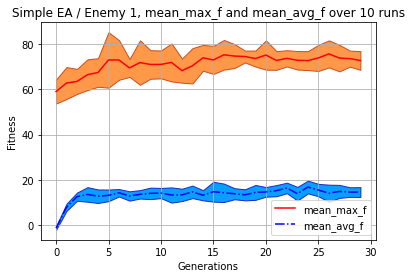

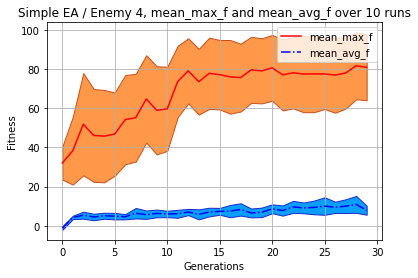

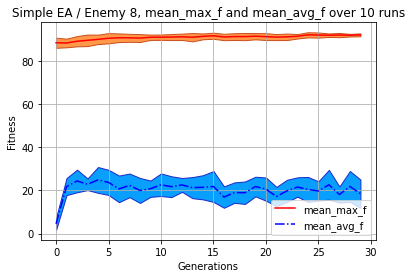

In [3]:
# 6 plots, by enemy. Average of the mean and maximum per population over the 10 runs (and both algorithms in the same plot!)
# See plot_stats for example, adjust where needed
mean_max_f_1, std_max_f_1, mean_avgs_1, std_avgs_1 = get_stats_simple_ea(SIMPLE_EA_RUNS_1)
mean_max_f_4, std_max_4, mean_avgs_4, std_avgs_4 = get_stats_simple_ea(SIMPLE_EA_RUNS_4)
mean_max_f_8, std_max_8, mean_avgs_8, std_avgs_8 = get_stats_simple_ea(SIMPLE_EA_RUNS_8)

plot_stats(mean_max_f_1, std_max_f_1, mean_avgs_1, std_avgs_1, 'Simple EA / Enemy 1, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_simple_ea_1.svg')
plot_stats(mean_max_f_4, std_max_4, mean_avgs_4, std_avgs_4, 'Simple EA / Enemy 4, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_simple_ea_4.svg')
plot_stats(mean_max_f_8, std_max_8, mean_avgs_8, std_avgs_8, 'Simple EA / Enemy 8, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_simple_ea_8.svg')

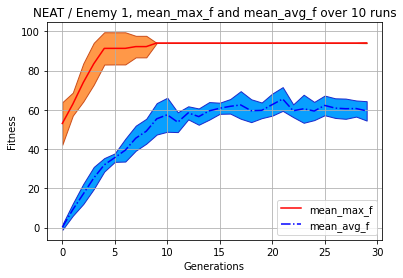

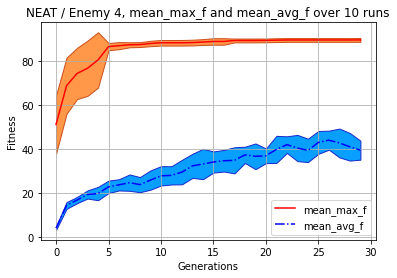

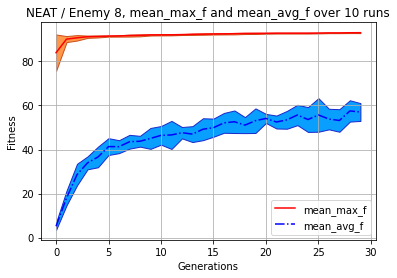

In [4]:
# Now for NEAT 
NEAT_RUNS_1 = get_pickle_object('./NEAT_specialized_agent_1/neat_experiment_runs')
NEAT_RUNS_4 = get_pickle_object('./NEAT_specialized_agent_4/neat_experiment_runs')
NEAT_RUNS_8 = get_pickle_object('./NEAT_specialized_agent_8/neat_experiment_runs')

# plot for neat
mean_max_f_1, std_max_f_1, mean_avgs_1, std_avgs_1 = get_stats_neat(NEAT_RUNS_1)
mean_max_f_4, std_max_4, mean_avgs_4, std_avgs_4 = get_stats_neat(NEAT_RUNS_4)
mean_max_f_8, std_max_8, mean_avgs_8, std_avgs_8 = get_stats_neat(NEAT_RUNS_8)

plot_stats(mean_max_f_1, std_max_f_1, mean_avgs_1, std_avgs_1, 'NEAT / Enemy 1, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_neat_1.svg')
plot_stats(mean_max_f_4, std_max_4, mean_avgs_4, std_avgs_4, 'NEAT / Enemy 4, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_neat_4.svg')
plot_stats(mean_max_f_8, std_max_8, mean_avgs_8, std_avgs_8, 'NEAT / Enemy 8, mean_max_f and mean_avg_f over 10 runs',file_dir='./plots/', file_name='plot_neat_8.svg')

Compare your algorithms by enemy, testing 5 times your final best 3 solution for
each of the 10 independent runs, and present the individual gain in box-plots. 

Note that you need to calculate the means of the 5 times for each solution of the algorithm
for the enemy, and these means are the values that will be points in the box-plot.
In summary, it is a total of 3 pairs of box-plots (so 6 boxes), being one pair per
enemy. Additionally, do a statistical test to verify if the differences in the average of
these means are significant between the groups of best solutions, when comparing
two algorithms of an enemy

In [5]:
%%capture
# Simple EA winners
sea_best_individuals_1 = get_sea_best_indivuals(SIMPLE_EA_RUNS_1)
sea_best_individuals_4 = get_sea_best_indivuals(SIMPLE_EA_RUNS_4)
sea_best_individuals_8 = get_sea_best_indivuals(SIMPLE_EA_RUNS_8)
# Individual gain results
ig_result_1 = get_sea_individual_gain_results(1, sea_best_individuals_1)
ig_result_4 = get_sea_individual_gain_results(4, sea_best_individuals_4)
ig_result_8 = get_sea_individual_gain_results(8, sea_best_individuals_8)


In [6]:
%%capture
# NEAT winners
neat_best_individuals_1 = get_neat_best_individuals(NEAT_RUNS_1)
neat_best_individuals_4 = get_neat_best_individuals(NEAT_RUNS_4)
neat_best_individuals_8 = get_neat_best_individuals(NEAT_RUNS_8)
# Individual gain results
neat_ig_result_1 = get_neat_individual_gain_results(1, neat_best_individuals_1)
neat_ig_result_4 = get_neat_individual_gain_results(4, neat_best_individuals_4)
neat_ig_result_8 = get_neat_individual_gain_results(8, neat_best_individuals_8)

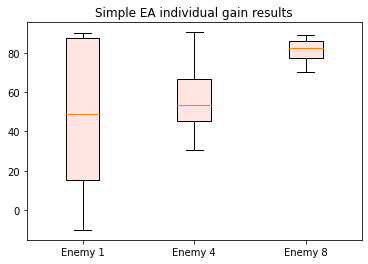

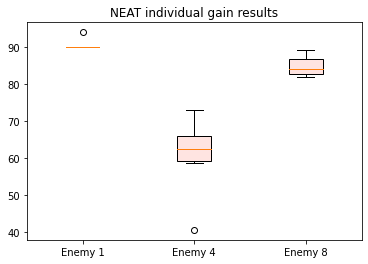

In [7]:
# Plot
plot_individual_gains([ig_result_1, ig_result_4, ig_result_8], 'Simple EA individual gain results', file_name='boxplots_sea.svg')
plot_individual_gains([neat_ig_result_1, neat_ig_result_4, neat_ig_result_8], 'NEAT individual gain results', file_name='boxplots_neat.svg')